In [108]:
from nltk.tokenize import word_tokenize, TweetTokenizer

all_arr = []

def read_lexicon(lexicon_name): 
    '''read lexicon from computer
        params: lexicon_name
        type: string'''
    
    f = open(f"{lexicon_name}.txt",'r')
    txt = f.readline()
    dict_vad = {}
    
    while txt != '' :
        txt = f.readline()
        if txt == '':
            break
        vad_arr = word_tokenize(txt)
        
        if lexicon_name == "NRC-VAD":
            key = vad_arr[0]
            starting_index = 1
            while vad_arr[starting_index].isalpha():
                starting_index = starting_index + 1
            value = vad_arr[starting_index:starting_index+3]
            dict_vad[key] = value
        all_arr.append(vad_arr)
    
    return dict_vad

            
dict_vad = read_lexicon("NRC-VAD")
print("Number of words in NRC-VAD:", len(all_arr))
all_arr = []
read_lexicon("NRC-AffectIntensity")
print("Number of words in NRC-AffectIntensity:", len(all_arr))

Number of words in NRC-VAD: 20007
Number of words in NRC-AffectIntensity: 5816


In [109]:
affects = [float(affect[1]) for affect in list(filter(None, list(dict_vad.values())))]
high_affects = [affect for affect in list(filter(None, affects)) if float(affect) > 0.8]
low_affects = [affect for affect in list(filter(None, affects)) if float(affect) < 0.3]
print("Words with affect greater than 0.8:", len(high_affects))
print("Word with affect lower than 0.25:", len(low_affects))

Words with affect greater than 0.8: 1197
Word with affect lower than 0.25: 2144


In [110]:
import pandas as pd

df = pd.read_csv("D:\\Marko\\Project_NLP_171161\\text_emotion.csv", 
           names=['tweet_id', 'target', 'author', 'text'],
           header=0)
df.head()

,tweet_id,target,author,text
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [111]:
import re
from string import punctuation

def preprocess_tweet(df):
    preprocessed_tweet = [tweet.lower() for tweet in df.text]

    r = re.compile(r'[{}]+'.format(re.escape(punctuation.replace("\'","").replace("-",""))))
    reap = re.compile(r'[{}]+'.format(re.escape("'-")))
    re2 = re.compile(r"&.*;")
    user = re.compile(r"@.*")

    preprocessed_tweets = []
    for tweet in preprocessed_tweet:
        filtered = []
        for word in tweet.split(' '):
            if user.sub('', word) != "":
                filtered.append(word)
        tweet_new = ' '.join(filtered)
        preprocessed_tweets.append(tweet_new)

    preprocessed_tweets = [re2.sub('', tweet) for tweet in preprocessed_tweets]
    preprocessed_tweets = [r.sub(' ', tweet).strip() for tweet in preprocessed_tweets]
    preprocessed_tweets = [reap.sub('', tweet) for tweet in preprocessed_tweets]
    preprocessed_tweets = [re.sub(' +', ' ', tweet) for tweet in preprocessed_tweets]
    
    return preprocessed_tweets

df.text = preprocess_tweet(df)
df.head()

,tweet_id,target,author,text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier and...
1,1956967666,sadness,wannamama,layin n bed with a headache ughhhh waitin on y...
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends soon
4,1956968416,neutral,xkilljoyx,we want to trade with someone who has houston ...


In [112]:
found = []
sentence_found = []
total_sent_affect = []
total_sent_dom = []
for sentence in df.text:
    sent_f = False
    sentence_affect = []
    sentence_dom = []
    for word in sentence.split():
        if word in dict_vad.keys():
            sent_f = True
            found.append(True)
            sentence_affect.append(float(dict_vad[word][1]))
            sentence_dom.append(float(dict_vad[word][2]))
    if sent_f:
        sentence_found.append(sent_f)
    total_sent_affect.append(sentence_affect)
    total_sent_dom.append(sentence_dom)
print("In the tweets were found", len(found) , "words")
print("From the tweets words were found in", len(sentence_found) , "from 40000 tweets")

In the tweets were found 179232 words
From the tweets words were found in 38532 from 40000 tweets


In [113]:
max_affect = []
max_dom = []
for i in total_sent_affect:
    if len(i) > 0:
        max_affect.append(max(i))
    if len(i) == 0:
        max_affect.append(0)
        
for i in total_sent_dom:
    if len(i) > 0:
        max_dom.append(max(i))
    if len(i) == 0:
        max_dom.append(0)
print(len(max_affect))
greater_than_point8 = [i for i in max_affect if i > 0.8]
less_than_point25 = [i for i in max_affect if i < 0.442 and i > 0]
print(len(greater_than_point8))
print(len(less_than_point25))
'''greater_than_point8 = [i for i in max_dom if i > 0.8]
less_than_point25 = [i for i in max_dom if i < 0.45]
print(len(greater_than_point8))
print(len(less_than_point25))'''

40000
6043
6088


'greater_than_point8 = [i for i in max_dom if i > 0.8]\nless_than_point25 = [i for i in max_dom if i < 0.45]\nprint(len(greater_than_point8))\nprint(len(less_than_point25))'

In [114]:
classes = []
for i in max_affect:
    if i > 0.8:
        classes.append("high")
    elif i < 0.442:
        classes.append("low")
    else:
        classes.append("none")

df["affect"] = classes

df = df[df.affect != "none"]
print(df.shape)
df.head()

(13599, 5)


,tweet_id,target,author,text,affect
6,1956968487,sadness,ShansBee,i should be sleep but im not thinking about an...,high
7,1956968636,worry,mcsleazy,hmmm http www djhero com is down,low
9,1956969172,sadness,Ingenue_Em,im sorry at least its friday,low
11,1956969531,worry,dudeitsmanda,choked on her retainers,low
12,1956970047,sadness,Danied32,ugh i have to beat this stupid song to get to ...,high


In [116]:
import csv
file = open('arousal.csv', 'w+', encoding="utf-8")
dataWriter = csv.writer(file, delimiter=',',lineterminator="\n")

total = 13599
for i in range(total):
    dataWriter.writerow([df.values[i,0], df.values[i,1], df.values[i,2], df.values[i,3], df.values[i,4]])
print('Completed preprocessing!')
file.close()

Completed preprocessing!


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import tensorflow_hub as hub
import tensorflow as tf
import official.nlp.bert.tokenization as tokenization

x = df.text
y = df.affect

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

label_encoder = LabelEncoder()

label_encoder.fit(y)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

dummy_y_train = np_utils.to_categorical(encoded_y_train)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

print(x_train.shape)
print(x_test.shape)

print(encoded_y_train)
print(dummy_y_train)

loaded_model = hub.load('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/2')
bert_layer = hub.KerasLayer(loaded_model, trainable = False)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
print("Path to locally saved vocabulary:", vocab_file)
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
print("Is the text lowercased before training the model?", do_lower_case)

tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

def encode_names(n):
    tokens = list(tokenizer.tokenize(n))
    tokens.append('[SEP]')
    return tokenizer.convert_tokens_to_ids(tokens)

tweets = tf.ragged.constant([
    encode_names(n) for n in x
])

tweet_lens = [len(tweet) for tweet in tweets]

max_seq_len = int(max(tweet_lens)*1.5)
print("Max length of the tweets is", max_seq_len)

(10879,)
(2720,)
[1 0 0 ... 0 1 0]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
Path to locally saved vocabulary: b'C:\\Users\\Dell\\AppData\\Local\\Temp\\tfhub_modules\\c1fce07c21cd96ce9003d3fa248853470512b3a0\\assets\\vocab.txt'
Is the text lowercased before training the model? True
Max length of the tweets is 90


In [120]:
import numpy as np

def encode_names(n, tokenizer):
    tokens = list(tokenizer.tokenize(n))
    tokens.append('[SEP]')
    return tokenizer.convert_tokens_to_ids(tokens)

def bert_encode(string_list, tokenizer, max_seq_length):
    num_examples = len(string_list)
    
    string_tokens = tf.ragged.constant([
        encode_names(n, tokenizer) for n in np.array(string_list)
    ])
    
    cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*string_tokens.shape[0]
    input_word_ids = tf.concat([cls, string_tokens], axis=1)
    
    input_mask = tf.ones_like(input_word_ids).to_tensor(shape=(None, max_seq_length))
    
    type_cls = tf.zeros_like(cls)
    type_tokens = tf.ones_like(string_tokens)
    input_type_ids = tf.concat([type_cls, type_tokens], axis=1).to_tensor(shape=(None, max_seq_length))
    
    inputs = {
        'input_word_ids': input_word_ids.to_tensor(shape=(None, max_seq_length)),
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    }
    
    return inputs

X_train = bert_encode(x_train, tokenizer, max_seq_len)
X_test = bert_encode(x_test, tokenizer, max_seq_len)

print(X_train['input_word_ids'][0])
print(X_train['input_mask'][0])
print(X_train['input_type_ids'][0])

tf.Tensor(
[ 101 2003 2055 2000 2156 7918 2050 2125 2005 1037 3204  102    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0], shape=(90,), dtype=int32)
tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(90,), dtype=int32)
tf.Tensor(
[0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(90,), dtype=int32)


In [121]:
num_class = len(label_encoder.classes_)

input_word_ids = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32, name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32, name="input_mask")
input_type_ids = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32, name="input_type_ids")

bert_input = {
    'input_word_ids': input_word_ids,
    'input_mask': input_mask,
    'input_type_ids': input_type_ids
}

outputs = bert_layer(bert_input)
#print(outputs)
pooled_output = outputs['pooled_output']
sequence_output = outputs['sequence_output']

print(pooled_output)

output = tf.keras.layers.Dropout(rate=0.2)(sequence_output)
output = tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu')(output)
output = tf.keras.layers.MaxPool1D(pool_size=4)(output)
output = tf.keras.layers.Dropout(rate=0.1)(output)
output = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')(output)
output = tf.keras.layers.MaxPool1D(pool_size=2)(output)
output = tf.keras.layers.Conv1D(filters=8, kernel_size=2, activation='relu')(output)
output = tf.keras.layers.MaxPool1D(pool_size=2)(output)
output = tf.keras.layers.Flatten()(output)
output = tf.keras.layers.Dense(num_class, activation='softmax')(output)

model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output
)

model.layers[3].trainable = True
print(model.layers[3].trainable)

model.layers[3].trainable = False
print(model.layers[3].trainable)

model.summary()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='keras_layer/StatefulPartitionedCall:5', description="created by layer 'keras_layer'")
True
False
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_mask (InputLayer)         [(None, 90)]         0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 90)]         0                                            
__________________________________________________________________________________________________
input_word_ids (InputLayer)     [(None, 90)]         0                                            
__________________________________________________________________________________________________
keras_la

In [122]:
history = model.fit(
    X_train,
    dummy_y_train,
    epochs=4,
    verbose=1
)

Epoch 1/4
340/340 [==============================] - 217s 614ms/step - loss: 0.3835 - accuracy: 0.8264
Epoch 2/4
340/340 [==============================] - 208s 611ms/step - loss: 0.3025 - accuracy: 0.8726
Epoch 3/4
340/340 [==============================] - 208s 611ms/step - loss: 0.2636 - accuracy: 0.8928
Epoch 4/4
340/340 [==============================] - 209s 615ms/step - loss: 0.2286 - accuracy: 0.9050


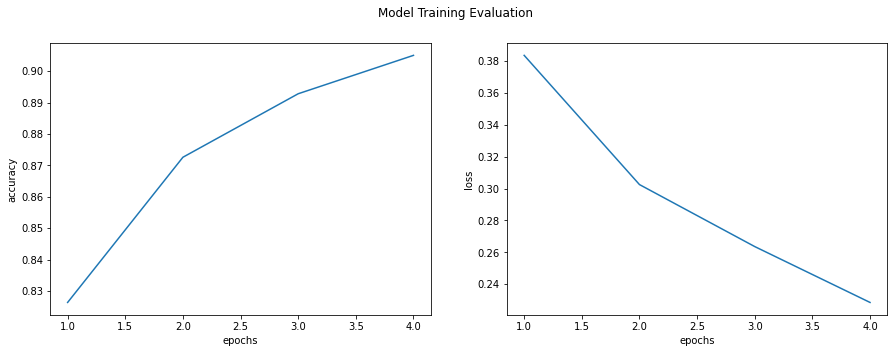

In [132]:
import matplotlib.pyplot as plt

metrics_data = [history.history['accuracy'], history.history['loss']]
labels = ['accuracy', 'loss']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

fig.suptitle("Model Training Evaluation")

for data, ax, label in zip(metrics_data, axes, labels):
    ax.set_xlabel('epochs')
    ax.set_ylabel(label)
    ax.plot(range(1,5), data)

plt.show()

In [133]:
evaluated_model = model.evaluate(X_test, dummy_y_test)
print(evaluated_model)

85/85 [==============================] - 50s 579ms/step - loss: 0.2215 - accuracy: 0.9085
[0.22151340544223785, 0.9084559082984924]


In [134]:
model.save('D:/my_saved_models/affect_prediction_model')

INFO:tensorflow:Assets written to: D:/my_saved_models/affect_prediction_model\assets


INFO:tensorflow:Assets written to: D:/my_saved_models/affect_prediction_model\assets
